## Group 11: Think Big Code Small

To compare our three results for what's the best neighborhood is, we took the top five results of each of our groups and assigned them points based on their 1-5 rank.


In [10]:
print("https://data.wprdc.org/dataset/neighborhoods-with-snap-data/resource/cdea4e5c-646d-4924-84b1-afc3a7206eb9")

https://data.wprdc.org/dataset/neighborhoods-with-snap-data/resource/cdea4e5c-646d-4924-84b1-afc3a7206eb9


## What's the Best Neighborhood in Pittsburgh?

For me, the best neighborhood is one that has a whole bunch of trees in it. I grew up in Ohio where there is almost nothing but farms and trees outside of the cities, so trees are pretty important to me. Plus, since global warming is becoming an increasingly bigger problem along with deforestation especially in the Amazon, who doesn't want a few extra trees?

So first I imported the massive data file from the WPRDC.

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
%matplotlib inline
import matplotlib.pyplot as plt

neighborhoods = pd.read_csv("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/3ca13246362540fa8b4b567f84a1255b_0.csv", index_col="SNAP_All_csv_Neighborhood")

The code below is filtering out the columns I don't need from the data set. The first line gets rid of the majority of the columns while the second and third lines filter out the columns individually.

The second and third lines are more individualized because when I was originally planning this out, I wanted to include parks as part of my categories for green space and trees, which was also included in the same data set. However, I realized that the data set doesn't specify what qualifies as a park. A park could be something like Schenley Park with tons of trees and very little human intervention, or it could be just a large patch of grass with a playground in it. So I ended up cutting that part out and just narrowing it down to trees per neighborhood.

The data table below is split into the name of the neighborhood and how many trees it has.

In [12]:
neighborhoods.drop(neighborhoods.iloc[:, 1:159], inplace = True, axis = 1)
neighborhoods.drop(neighborhoods.columns[[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]], inplace = True, axis = 1)
neighborhoods.drop(neighborhoods.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,]], inplace = True, axis = 1)
neighborhoods

,SNAP_All_csv___Street_Trees
SNAP_All_csv_Neighborhood,
Central Oakland,237
North Oakland,635
West Oakland,73
Crawford-Roberts,417
Strip District,173
Central Business District,694
Spring Hill-City View,115
Perry South,303
Summer Hill,137


Next I plotted that data table into a bar graph, with the extra code increasing its size so each neighborhood name is readable.

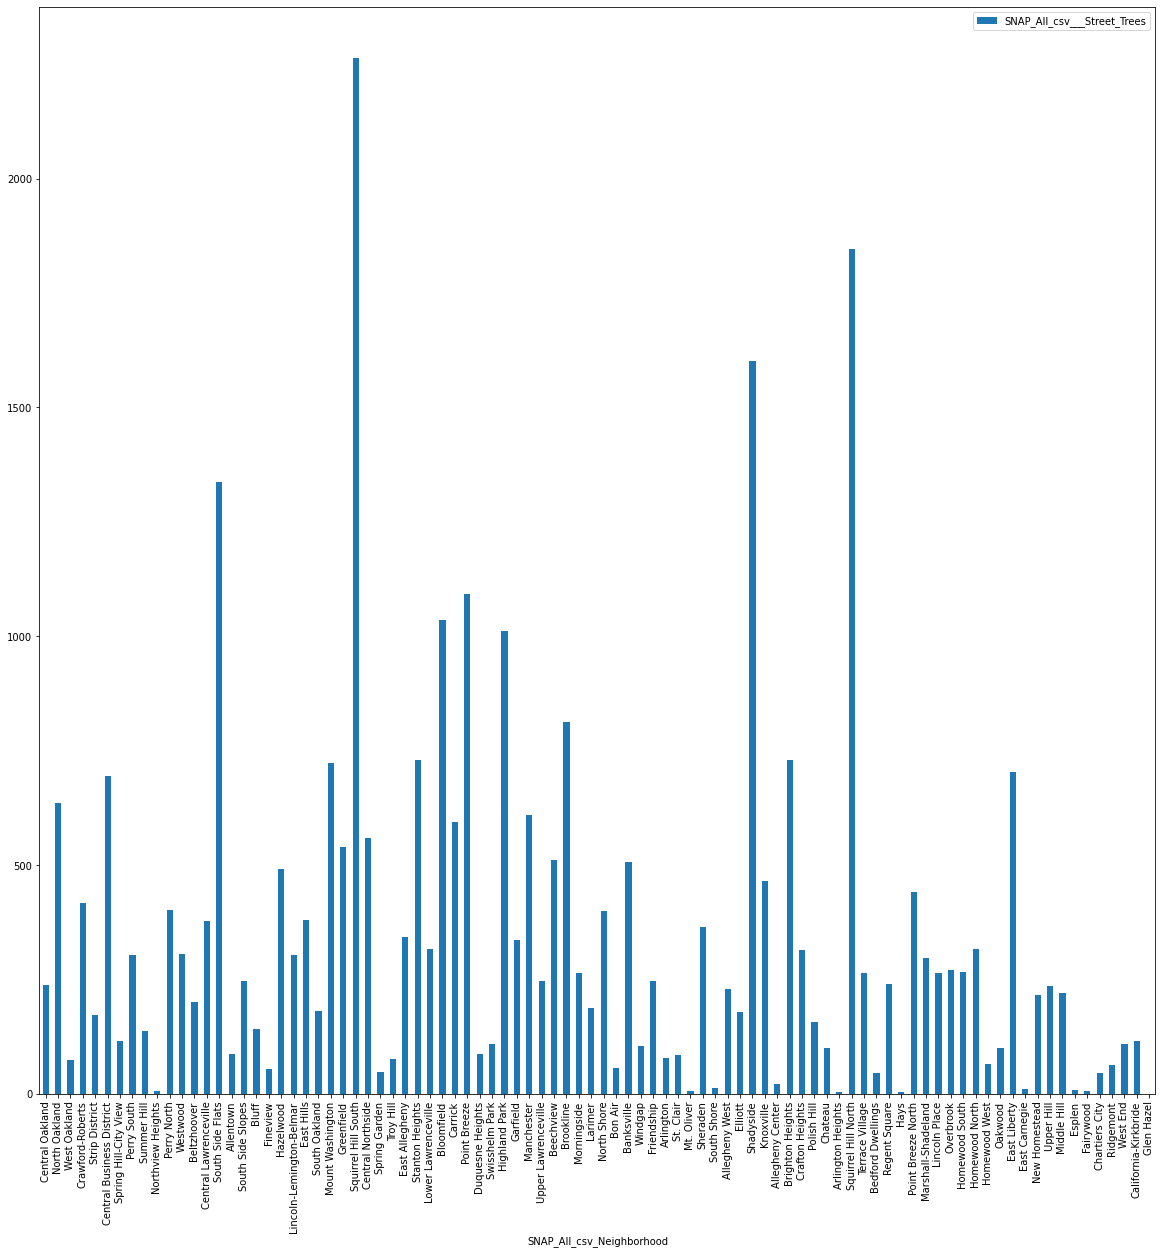

In [13]:
neighborhoods.plot(kind = 'bar', figsize = (20,20))

With this graph we can say the neighborhood that has the most trees is

# Squirrel Hill North

with Squirrel Hill South being the second closest, and Shadyside being the next closest that isn't Squirrel Hill.

Using the code below, we can figure out what the highest amount of trees is.

In [14]:
neighborhoods.max()

SNAP_All_csv___Street_Trees    2263
dtype: int64

So in my opinion, Squirrel Hill North is the best neighborhood because it has a staggering 2,263 trees in its neighborhood. As for the top five that we'll use to compare the best neighborhood between the three of us, here they are in ascending order using a sort_values code:

In [15]:
print(neighborhoods.sort_values('SNAP_All_csv___Street_Trees', ascending = 1,) [85:90])

                           SNAP_All_csv___Street_Trees
SNAP_All_csv_Neighborhood                             
Point Breeze                                      1092
South Side Flats                                  1337
Shadyside                                         1601
Squirrel Hill North                               1846
Squirrel Hill South                               2263


That means Point Breeze gets 1 point, South Side Flats gets 2 points, Shadyside gets 3 points, Squirrel Hill North gets 4 points, and Squirrel Hill South gets 5 points.

## Second Metric

The second metric we used was how many arrests occurred in any given neighborhood.

                         ARRESTTIME
INCIDENTNEIGHBORHOOD               
Mt. Oliver Neighborhood           2
Troy Hill-Herrs Island            6
Mt. Oliver Boro                  16
Regent Square                    22
Central Northside                23


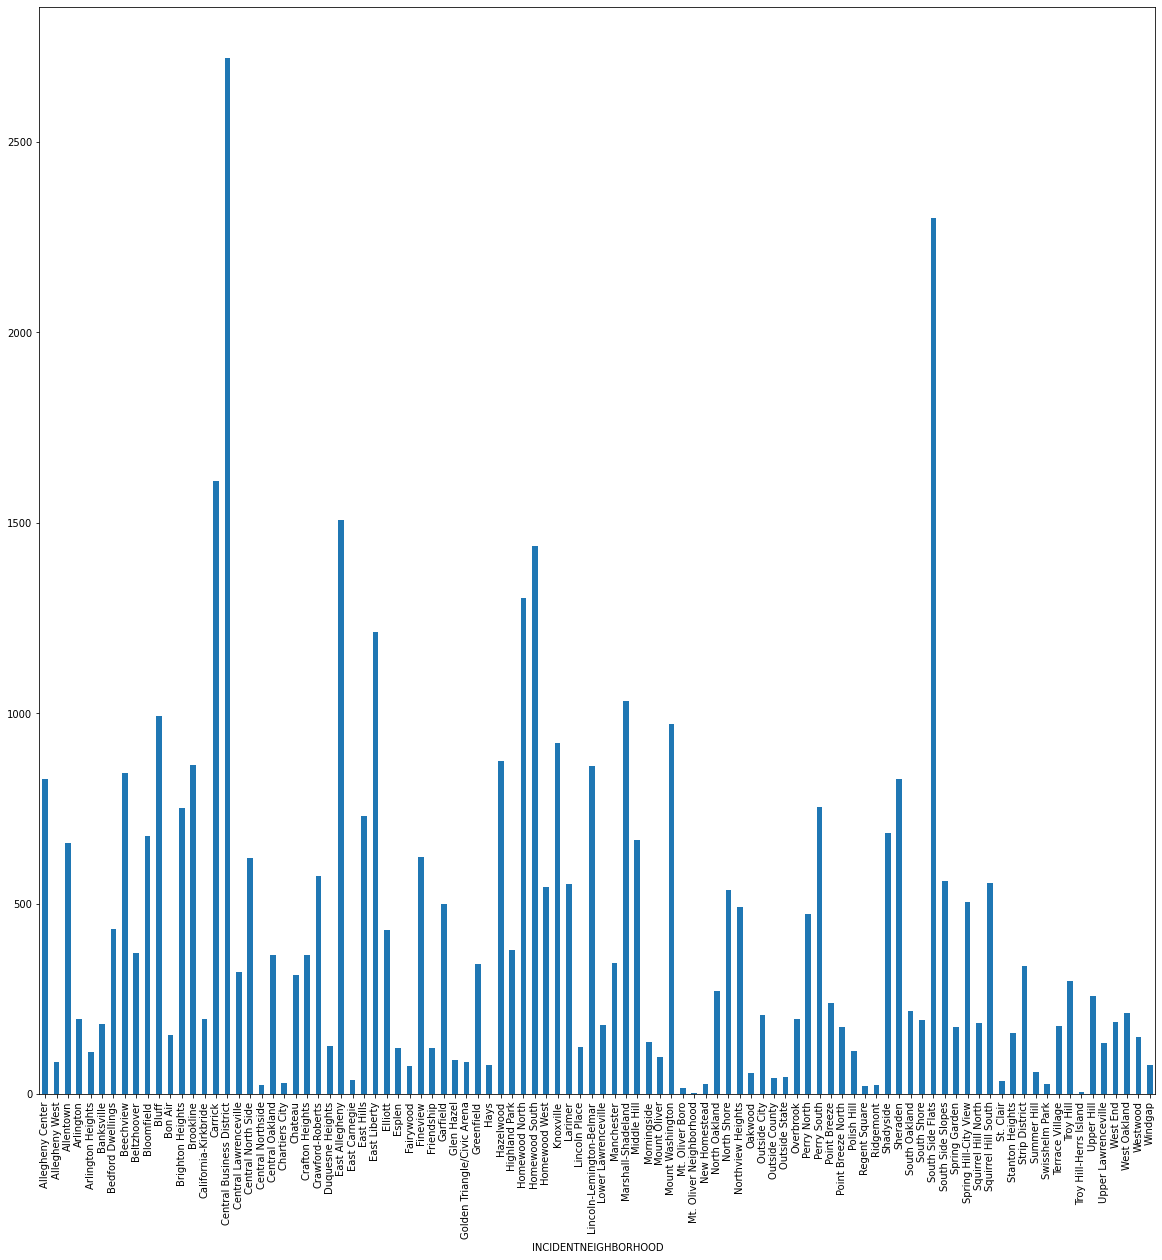

In [6]:
crimes = pd.read_csv("PittsburghCrimeData.csv", index_col="CCR")
check = crimes.groupby('INCIDENTNEIGHBORHOOD')
temp = check['ARRESTTIME'].count()
dTemp = DataFrame(temp)
dTemp = dTemp.sort_values(['ARRESTTIME'], ascending=1)
print(dTemp[0:5])
temp.plot(x='INCIDENTNEIGHBORHOOD', kind='bar', figsize=(20, 20))

Squirrel Hill North Takes 37th excluding the outside state and county listings. However, my top five are Mt. Oliver (5 Points), Troy Hills (4 Points), Herrs Island (3 Points), Regent Square (2 Points) and Northside (1 Point).

## Third Metric — Educational Opportunity

*When asked to decide on a definitive metric to use to determine the "best" neighborhood in Pittsburgh, I immediately thought back to Human Development Index (HDI) I learned of when taking Human Geography in high school. This index provides a numerical means of measuring a nation's average achievement by producing a composite score based on what are considered to be the key dimensions of human progress.*

*If someone were to ask me for a data-driven means of selecting the "best" country in the world, I would immediately default to this index. So, when asked to select the "best" country, it's only reasonable to assume that the metric to be used in this definition is one of the dimensions that constitute the HDI index.*

*This narrowed my options down to four categories: life expectancy, education, and per capita income indicators. Out of all of these, I consider education to be the most indicative of progress in a small community. While both income and life expectancy are strong indicators of a successful community at any scale, both of these factors are often directly influenced by one's level of education. In my mind, this makes education the best choice for this analysis.*

***The Education Oppurtunity Score will be equal to the percentage of teachers who preform at a "distiguished" level. This data was gathered using the 2016 Report to the Community on Public School Progress in Pittsburgh.***


*To start, I imported a my data set.*

In [22]:
import pandas as pd
import numpy as np
from pandas import DataFrame
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

school_data = DataFrame(pd.read_csv("pps_schoolsapr2019publish_edited.csv", index_col = "sourcedid"))

*The following is a sample data table displaying information about 10 schools in Pittsburgh.*

In [23]:
school_data[0:10]

,name,address,city,neighborhood,score,state,zip,latitude,longitude
sourcedid,,,,,,,,,
301,Allderdice High School,2409 SHADY AVE,PITTSBURGH,Squirrel Hill,83,PA,15217,40.42942,-79.9194
204,Allegheny 6-8,810 ARCH ST,PITTSBURGH,Allegheny Center,25,PA,15212,40.45323,-80.0087
102,Allegheny K-5,810 ARCH ST,PITTSBURGH,Allegheny Center,86,PA,15212,40.45318,-80.0089
101,Arlington PreK-8,800 RECTENWALD ST,PITTSBURGH,Arlington,75,PA,15210,40.40857,-79.9794
298,Arsenal 6-8,220 40TH STREET,PITTSBURGH,Center Lawrenceville,75,PA,15201,40.46833,-79.9619
108,Arsenal PreK-5,215 39th St,PITTSBURGH,Central Lawrenceville,32,PA,15201,40.46737,-79.9634
103,Banksville K-5,1001 CARNAHAN RD,PITTSBURGH,Banksville,81,PA,15216,40.40742,-80.0367
105,Beechwood PreK-5,810 ROCKLAND AVE,PITTSBURGH,Beechview,100,PA,15216,40.41563,-80.0208
329,Brashear High School,590 CRANE AVE,PITTSBURGH,Beechview,59,PA,15216,40.41808,-80.0182


*This data is filtered by removing irrelevant information, then aggregating scores based on neighborhood. In lines 1 and 2 of the following cell, the drop() method is used to eliminate every column besides neighborhood and score. The last line of the cell combines all rows that share the same neighborhood value, then averages them.*

In [24]:
school_data.drop(school_data.columns[0:3], inplace = True, axis = 1)
school_data.drop(school_data.columns[2:6], inplace = True, axis = 1)
school_data = school_data.groupby('neighborhood').agg('mean')

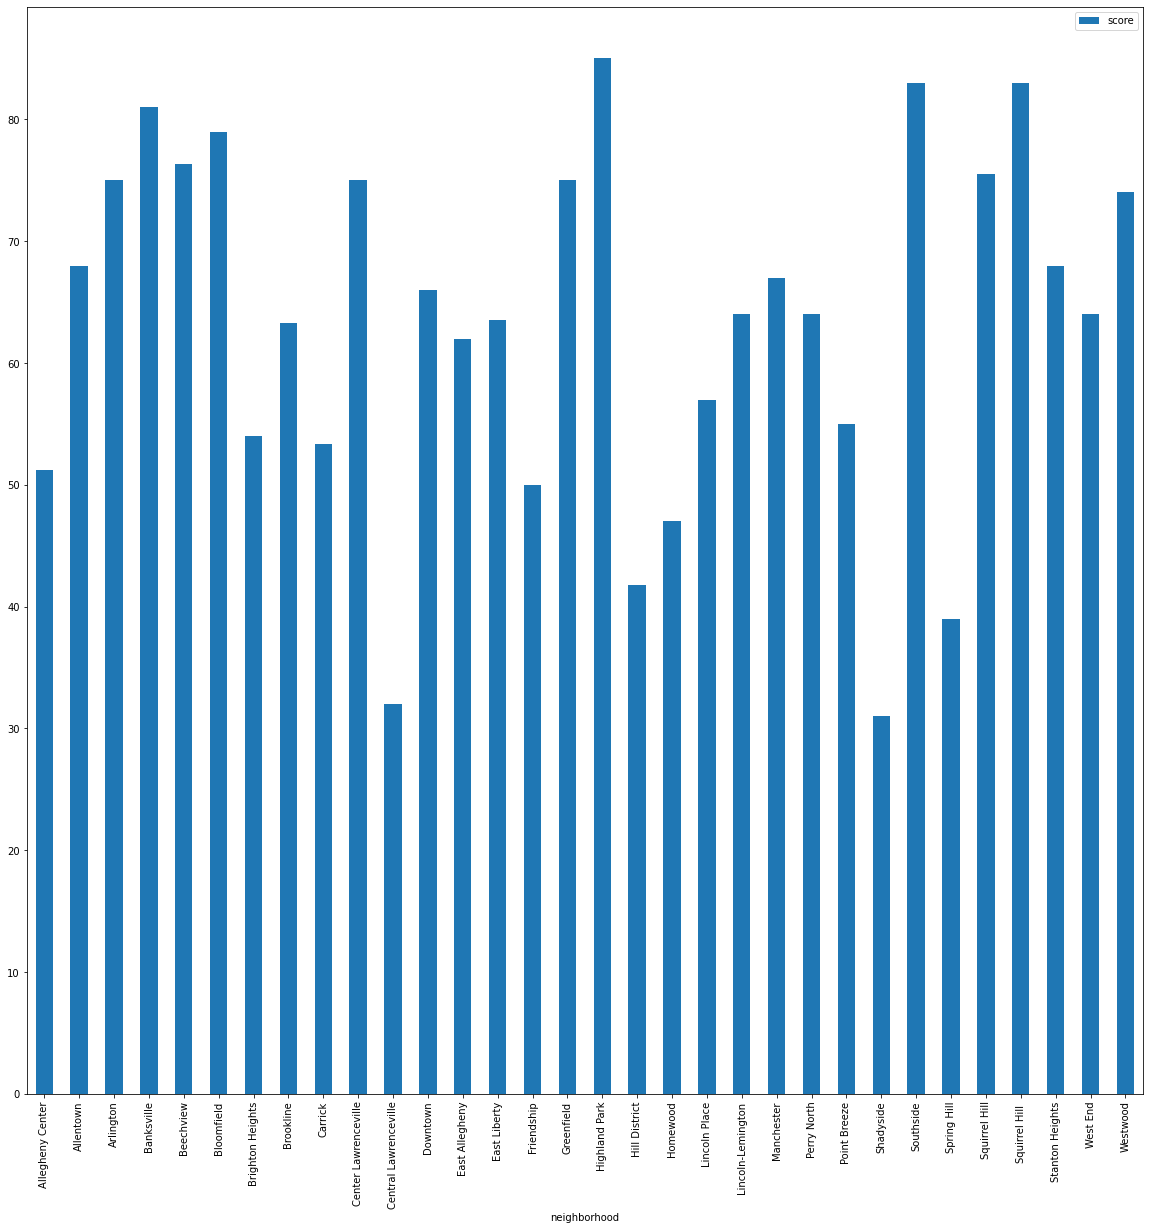

In [25]:
school_data.plot(kind='bar', figsize=(20, 20))

#### *Given the provided data, we can conclude that the best neighborhood in Pittsburgh is:* ***Highland Park***

*Among these rankings, Squirrel Hill ranked 2nd*

***There rankings for the top five best neighborhoods in Pittsburgh are as follows:***
<ol>
<li>Highland Park  |  85.0  | 5 Points</li> 
<li>Southside  |  83.0  | 4 Points</li>
<li>Squirrel Hill  |  83.0  | 4 Points</li>
<li>Banksville  |  81.0  | 2 Points</li>
<li>Bloomfield  |  79.0  | 1 Points</li>
</ol>

*Using my metric, Highland park is the best neighborhood in Pittsburgh, as it averages 85% of its educators "distinguished" for the effectiveness of their teaching, with Squirrel Hill coming tying for second by 2 percentage points.*

# <b>Conclusion</b>

In each individual metric we ranked our top five neighborhoods in Pittsburgh. Then to combine them we assigned 5 points for each individual best neighborhood, 4 points for each individual second best, 3 points for each individual 3rd best, 2 points for each individual 4th best, and 1 point for each 5th best. This brings the total for the highest scorer to Squirrel Hill South: 10 points, Squirrel  and no other neighborhood appeared in two of the top fives. This means that Squirrel Hill is the best neighborhood in Pittsburgh. 